___

Escriba una función Python llamada calculate_area que tome como argumento radio. La función debe calcular el área de un círculo dado el radio.

Asegúrese de que la función maneja entradas no numéricas lanzando un ValueError con el mensaje "La entrada debe ser un valor numérico". Tambien que si el radio es menor de 0 lanze un ValueError con el mensaje "el radio no puede ser negativo" en los casos muestre el valor recibido Incluya comentarios en el código que expliquen cada paso.

In [2]:
import math

def calculate_area(radio):
    """
    Calcula el área de un círculo dado su radio.
    
    Parámetros:
    radio (float o int): El radio del círculo.
    
    Retorna:
    float: El área del círculo.
    
    Lanza:
    ValueError: Si la entrada no es numérica o si el radio es negativo.
    """
    # Verificar si la entrada es un número
    if not isinstance(radio, (int, float)):
        raise ValueError(f"La entrada debe ser un valor numérico. Valor recibido: {radio}")
    
    # Verificar si el radio es negativo
    if radio < 0:
        raise ValueError(f"El radio no puede ser negativo. Valor recibido: {radio}")
    
    # Calcular el área del círculo usando la fórmula A = πr²
    area = math.pi * (radio ** 2)
    return area

In [3]:
# Ejemplo de uso
try:
    resultado = calculate_area(5)
    print(f"El área del círculo es: {resultado:.2f}")
except ValueError as e:
    print(e)

El área del círculo es: 78.54


Este código garantiza que solo se acepten valores numéricos y no negativos como radio. Si la entrada es inválida, se lanza un ValueError con un mensaje descriptivo.

___

hola tengo el siguiente código :
```python
import requests

def descargar_archivo(url, nombre_archivo):
    respuesta = requests.get(url)
    with open(nombre_archivo, 'wb') as archivo:
        archivo.write(respuesta.content)
```
necesitaria un head para evitar los bloqueos y permitir descargar documentos de texto plano tambien.

Puedes agregar un encabezado User-Agent para evitar bloqueos y verificar el tipo de contenido antes de guardar el archivo. Aquí tienes la versión mejorada:

In [ ]:
import requests

def descargar_archivo(url, nombre_archivo):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    
    respuesta = requests.get(url, headers=headers)
    
    if respuesta.status_code == 200:
        # Detecta si el contenido es texto plano
        content_type = respuesta.headers.get("Content-Type", "")
        modo = "wb" if "text" not in content_type else "w"
        
        with open(nombre_archivo, modo) as archivo:
            archivo.write(respuesta.content if "text" not in content_type else respuesta.text)
        print(f"Archivo guardado como: {nombre_archivo}")
    else:
        print(f"Error al descargar: {respuesta.status_code}")

# Ejemplo de uso
# descargar_archivo("https://ejemplo.com/archivo.txt", "archivo.txt")

## Mejoras:

1. Evita bloqueos:
   
     Se añade un User-Agent para hacer que la solicitud parezca provenir de un navegador real.

2. Manejo de contenido:
  
     Si el archivo es de texto (text/plain, text/html, etc.), se guarda en modo "w" en lugar de binario.

3. Manejo de errores:

     Verifica el código de estado antes de guardar.

___

Genera Documentacion y comentarios para el siguiente código:
```python 
def unicos_con_orden(items): 
    def _unicos(items): 
        seen = set() 
        for item in items: 
            if item not in seen: 
                  yield item 
                 seen.add(item) 
    return list(_unicos(items))
```

Aquí tienes la documentación y los comentarios para tu código:

In [8]:
def unicos_con_orden(items):
    """
    Elimina los elementos duplicados de una secuencia mientras preserva el orden original.
    
    Parámetros:
        items (iterable): Una lista o cualquier iterable que contenga elementos.
    
    Retorna:
        list: Una lista con los elementos únicos en el mismo orden en que aparecen por primera vez.
    """
    def _unicos(items):
        """
        Generador interno que produce elementos únicos manteniendo el orden de aparición.
        
        Parámetros:
            items (iterable): Un iterable con elementos.
        
        Retorna:
            generator: Un generador que produce los elementos únicos en orden.
        """
        seen = set()  # Conjunto para almacenar elementos ya vistos
        for item in items:
            if item not in seen:
                yield item  # Devuelve el elemento si no ha sido visto antes
                seen.add(item)  # Agrega el elemento al conjunto de vistos
    
    return list(_unicos(items))  # Convierte el generador en lista y lo retorna


He agregado documentación clara y comentarios explicativos para que el código sea más comprensible. ¿Quieres que haga algún ajuste o agregue más detalles?

In [9]:
lista = [0,1,2,4,5,3,6,1,2,3,5,0,0,458,985,458]

In [10]:
unicos_con_orden(lista)

[0, 1, 2, 4, 5, 3, 6, 458, 985]

___

Actúa como un arquitecto de software y un experto en seguridad. 
Evalúa el siguiente script y proporciona retroalimentación 
sobre su estructura y vulnerabilidades.

```python
def storeuserdata(user_data):
 database = open(‘user_database.txt’, ‘a’)
 database.write(str(user_data))
 database.close()
storeuserdata({‘username’: ‘admin’, ‘password’: ‘1234’})
```


Como arquitecto de software y experto en seguridad, hay varios puntos que deben abordarse en este script. Aquí te dejo la retroalimentación detallada:

1. Inseguridad en el almacenamiento de contraseñas:

  - El almacenamiento de contraseñas como texto plano ('password': '1234') es una vulnerabilidad grave. Las contraseñas deben ser hasheadas (por ejemplo, utilizando bcrypt o argon2) antes de almacenarlas en cualquier base de datos. De lo contrario, si un atacante obtiene acceso al archivo user_database.txt, podrá leer las contraseñas sin dificultad.
   
  - **Recomendación**: Utiliza una librería de hashing de contraseñas como bcrypt para almacenar contraseñas de manera segura.

2. Inseguridad en el archivo de almacenamiento (user_database.txt):

  - Usar un archivo de texto plano para almacenar datos sensibles es muy riesgoso. Los archivos de texto pueden ser fácilmente leídos y manipulados si un atacante tiene acceso al sistema.
  - **Recomendación**: Utiliza una base de datos en lugar de un archivo de texto para almacenar datos de usuario. Bases de datos como SQLite, MySQL, o PostgreSQL proporcionan mecanismos de seguridad y acceso controlado más robustos.

3. Uso de apertura de archivos sin contexto:
  - El script utiliza open() sin el uso de un bloque with. Usar un bloque with es más seguro porque asegura que el archivo se cierre automáticamente, incluso si ocurre un error dentro del bloque.
  - **Recomendación**: Usa el contexto adecuado para manejar archivos:
    
    ```python
    with open('user_database.txt', 'a') as database:
    database.write(str(user_data))
    ```

4. Falta de validación de entrada:
  - No se valida el tipo o formato de los datos de entrada (user_data). Los datos podrían ser manipulados fácilmente y no se realiza ninguna verificación.
  - **Recomendación**: Realiza una validación de los datos antes de escribirlos en el archivo o base de datos. Por ejemplo, asegúrate de que los datos sigan el formato esperado (nombres de usuario válidos, contraseñas que cumplan con los requisitos de seguridad, etc.).

5. Inyección de datos:
  - Al escribir los datos en el archivo como un str(user_data), no hay ninguna protección contra inyecciones de código o datos maliciosos que puedan ser interpretados de manera incorrecta al leer el archivo posteriormente.
  - **Recomendación**: Evita usar str() para convertir datos y escribe de manera estructurada, como en un formato JSON o en un sistema de base de datos. Además, valida los datos antes de escribirlos.

6. Control de errores:
  - El script no tiene manejo de errores. Si hay un problema al abrir el archivo (por ejemplo, falta de permisos), el script fallará sin proporcionar información útil.
  - **Recomendación**: Agrega un manejo adecuado de excepciones para manejar problemas como fallos en la apertura del archivo, escritura o lectura de datos:

    ```python
    try:
        with open('user_database.txt', 'a') as database:
        database.write(str(user_data))
    except Exception as e:
        print(f"Error al guardar los datos: {e}")
    ```


7. Manejo de datos sensibles:
  - Es importante no almacenar datos sensibles (como contraseñas o datos personales) sin cifrado o al menos una técnica de enmascaramiento. De no hacerlo, el sistema es vulnerable a ataques internos o externos.
  - **Recomendación**: Cifra los datos sensibles (como las contraseñas) antes de almacenarlos, utilizando técnicas como AES para cifrado o JWT para autenticación de sesiones.

> Conclusión:
Este script es vulnerable a múltiples riesgos de seguridad. Lo más importante es cambiar el método de almacenamiento de contraseñas y datos sensibles, y usar una base de datos segura con buenas prácticas de validación y cifrado. Además, implementar un manejo adecuado de archivos y errores es fundamental para mejorar la robustez del sistema.

___

Como colaborador de proyectos de código abierto en Python, critica esta biblioteca de Python para visualización de datos y sugiere mejoras para hacerla comparable a bibliotecas importantes como Matplotlib o Seaborn


```python
import matplotlib.pyplot as plt

class DataVisualizer:
    
    def __init__(self, data):
        self.data = data      
    def plot(self, kind='line'):         
        if kind == 'line':             
            plt.plot(self.data)         
        elif kind == 'bar':             
            plt.bar(range(len(self.data)), self.data)         
        plt.show()
```

Aquí hay varias oportunidades de mejora para hacer esta biblioteca más competitiva con Matplotlib o Seaborn:

**Críticas y Mejoras**
1. Falta de Flexibilidad en Datos de Entrada:
  - Actualmente, solo acepta una lista unidimensional. Para ser más útil, debería soportar estructuras de datos más versátiles como pandas.DataFrame o numpy.array.
  - Se podría agregar soporte para múltiples series de datos.

2. Opciones de Personalización Limitadas
  - No permite modificar aspectos clave del gráfico, como colores, etiquetas, títulos, tamaño de la figura, etc.
  - Se podría agregar parámetros opcionales para personalización, como xlabel, ylabel, title, color, legend, etc.

3. Ausencia de Manejo de Errores
  - Si el usuario pasa datos incorrectos (por ejemplo, una cadena en lugar de una lista de números), el código lanzará un error sin un mensaje claro.
  - Se debería agregar validación de entrada con mensajes de error descriptivos.

4. Pocas Opciones de Gráficos
  - Solo admite line y bar. Se podría ampliar la funcionalidad con gráficos adicionales como scatter, hist, boxplot, etc.
  - Se puede aprovechar plt.subplots() para mejorar la disposición de los gráficos.

5. Uso Ineficiente de Matplotlib
  - Se puede mejorar el rendimiento y la modularidad utilizando objetos Figure y Axes en lugar de los métodos globales de matplotlib.pyplot.

Versión Mejorada
Aquí tienes una versión más robusta de la biblioteca:

```python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class DataVisualizer:
    def __init__(self, data):
        if not isinstance(data, (list, np.ndarray, pd.Series, pd.DataFrame)):
            raise TypeError("Data must be a list, NumPy array, pandas Series, or DataFrame")
        self.data = data

    def plot(self, kind='line', xlabel='', ylabel='', title='', color=None, legend=None):
        fig, ax = plt.subplots()

        if isinstance(self.data, (list, np.ndarray, pd.Series)):
            x = range(len(self.data))
            y = self.data
        elif isinstance(self.data, pd.DataFrame):
            x = self.data.index
            y = self.data.values.T  # Transpuesta para iterar columnas

        if kind == 'line':
            ax.plot(x, y, color=color if color else 'b')
        elif kind == 'bar':
            ax.bar(x, y[0] if isinstance(y, np.ndarray) else y, color=color if color else 'g')
        elif kind == 'scatter':
            ax.scatter(x, y, color=color if color else 'r')
        elif kind == 'hist':
            ax.hist(y, bins=10, color=color if color else 'purple', alpha=0.7)
        else:
            raise ValueError(f"Unsupported plot type: {kind}")

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)

        if legend:
            ax.legend(legend)

        plt.show()
```

Beneficios de la Nueva Versión
- ✅ Soporte para list, numpy.array, pandas.Series y pandas.DataFrame.
- ✅ Mayor flexibilidad con personalización de etiquetas, colores y leyendas.
- ✅ Más tipos de gráficos (scatter, hist).
- ✅ Manejo de errores mejorado con validaciones y mensajes claros.
- ✅ Uso eficiente de matplotlib con Figure y Axes.

Con estas mejoras, la biblioteca puede ser un punto de partida más sólido para un proyecto de código abierto con potencial de crecimiento. 🚀

Dijiste:
dame ejemplos de uso

ChatGPT dijo:
Aquí tienes ejemplos de uso con diferentes tipos de datos y configuraciones personalizadas para la versión mejorada de DataVisualizer.

- 1️⃣ Usando una Lista (Serie Unidimensional)
  ```python
        data = [10, 20, 15, 30, 25]
        visualizer = DataVisualizer(data)
        visualizer.plot(kind='line', xlabel='Índice', ylabel='Valor', title='Gráfico de Línea')
    ```

📌 Salida: Un gráfico de líneas con los valores [10, 20, 15, 30, 25].

- 2️⃣ Usando un numpy.array
  ```python
        import numpy as np

        data = np.random.randint(1, 100, 10)  # 10 valores aleatorios entre 1 y 100
        visualizer = DataVisualizer(data)
        visualizer.plot(kind='bar', xlabel='Índice', ylabel='Valor', title='Gráfico de Barras', color='orange')
    ```
📌 Salida: Un gráfico de barras con valores aleatorios.

- 3️⃣ Usando un pandas.Series
    ```python
        import pandas as pd

        data = pd.Series([3, 7, 2, 8, 5])
        visualizer = DataVisualizer(data)
        visualizer.plot(kind='scatter', xlabel='Índice', ylabel='Valor', title='Gráfico de Dispersión', color='red')
        ```
📌 Salida: Un gráfico de dispersión con puntos rojos.

- 4️⃣ Usando un pandas.DataFrame con Varias Series
    ```python
        df = pd.DataFrame({'A': np.random.randint(1, 50, 10),
                           'B': np.random.randint(1, 50, 10)
                           })

        visualizer = DataVisualizer(df)
        visualizer.plot(kind='line', xlabel='Índice', ylabel='Valores', title='Gráfico de Múltiples Series', legend=['A', 'B'])
    ```        
📌 Salida: Un gráfico de líneas con dos series (A y B) y su leyenda.

- 5️⃣ Histograma con Datos Aleatorios
    ```python
        data = np.random.randn(1000)  # 1000 valores con distribución normal
        visualizer = DataVisualizer(data)
        visualizer.plot(kind='hist', xlabel='Valor', ylabel='Frecuencia', title='Histograma', color='purple')
    ```
📌 Salida: Un histograma con distribución normal.


Con estos ejemplos, puedes ver la flexibilidad de la clase DataVisualizer. 🔥
¿Qué te parece? ¿Te gustaría agregar más opciones, como boxplot o heatmap? 😊

en este ejemplo:
```python
df = pd.DataFrame({
    'A': np.random.randint(1, 50, 10),
    'B': np.random.randint(1, 50, 10)
})

visualizer = DataVisualizer(df)
visualizer.plot(kind='line', xlabel='Índice', ylabel='Valores', title='Gráfico de Múltiples Series', legend=['A', 'B'])
```
obtengo el siguiente error:

ValueError: x and y must have same first dimension, but have shapes (10,) and (2, 10)

El error ocurre porque y en el caso de un DataFrame se está transponiendo (y = self.data.values.T), lo que hace que y tenga una forma de (2, 10) en lugar de (10, 2).

Explicación del Problema
Cuando se usa ax.plot(x, y), x tiene una forma de (10,) (porque son los índices del DataFrame), pero y tiene una forma de (2, 10) después de la transposición. Matplotlib espera que x e y tengan la misma primera dimensión, por lo que lanza el error.

Ahora nececito una explicacion detallada y que me generes los docstring y comentarios en linea

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class DataVisualizer:
    """
    Clase para visualizar datos utilizando Matplotlib.
    
    Admite listas, arrays de NumPy, Series de Pandas y DataFrames de Pandas como entrada de datos.
    Puede generar gráficos de líneas, barras, dispersión e histogramas.
    """

    def __init__(self, data):
        """
        Inicializa el objeto DataVisualizer con los datos proporcionados.
        
        :param data: Datos a visualizar. Debe ser una lista, un array de NumPy, 
                     una Serie de Pandas o un DataFrame de Pandas.
        :raises TypeError: Si el tipo de datos no es compatible.
        """
        if not isinstance(data, (list, np.ndarray, pd.Series, pd.DataFrame)):
            raise TypeError("Data must be a list, NumPy array, pandas Series, or DataFrame")
        self.data = data  # Se almacena la data para su posterior visualización

    def plot(self, kind='line', xlabel='', ylabel='', title='', color=None, legend=None):
        """
        Genera un gráfico basado en los datos y el tipo de gráfico especificado.
        
        :param kind: Tipo de gráfico ('line', 'bar', 'scatter', 'hist').
        :param xlabel: Etiqueta del eje X.
        :param ylabel: Etiqueta del eje Y.
        :param title: Título del gráfico.
        :param color: Color de las líneas o barras (opcional).
        :param legend: Lista con nombres de las series para la leyenda (opcional).
        :raises ValueError: Si el tipo de gráfico no está soportado.
        """
        fig, ax = plt.subplots()  # Crea la figura y los ejes del gráfico

        # Determinar los valores de X e Y según el tipo de datos
        if isinstance(self.data, (list, np.ndarray, pd.Series)):
            x = range(len(self.data))  # Índices para el eje X
            y = self.data  # Valores en el eje Y

            if kind == 'line':
                ax.plot(x, y, color=color if color else 'b')
            elif kind == 'bar':
                ax.bar(x, y, color=color if color else 'g', edgecolor='black', width=0.6)
            elif kind == 'scatter':
                ax.scatter(x, y, color=color if color else 'r')
            elif kind == 'hist':
                ax.hist(y, bins=10, color=color if color else 'purple', alpha=0.7)
            else:
                raise ValueError(f"Unsupported plot type: {kind}")

        elif isinstance(self.data, pd.DataFrame):
            x = self.data.index  # Índices del DataFrame como eje X
            colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Lista de colores para múltiples series

            for i, col in enumerate(self.data.columns):
                if kind == 'line':
                    ax.plot(x, self.data[col], color=color if color else colors[i % len(colors)], label=col)
                elif kind == 'bar':
                    ax.bar(x, self.data[col], color=color if color else colors[i % len(colors)], 
                           edgecolor='black', width=0.6)
                elif kind == 'scatter':
                    ax.scatter(x, self.data[col], color=color if color else colors[i % len(colors)], label=col)
                elif kind == 'hist':
                    ax.hist(self.data[col], bins=10, color=color if color else colors[i % len(colors)], alpha=0.7)
                else:
                    raise ValueError(f"Unsupported plot type: {kind}")

            ax.legend()  # Agregar la leyenda automáticamente si hay varias series

        # Configuración de etiquetas y título
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(title)

        plt.show()  # Mostrar el gráfico

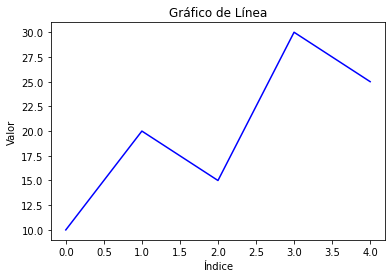

In [6]:
data = [10, 20, 15, 30, 25]
visualizer = DataVisualizer(data)
visualizer.plot(kind='line', xlabel='Índice', ylabel='Valor', title='Gráfico de Línea')

[15 98 10 65 47  9 35 78 39 11]


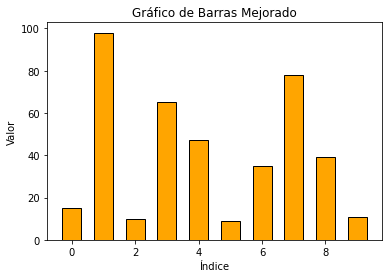

In [3]:
# Prueba con barras mejoradas
data = np.random.randint(1, 100, 10)  # 10 valores aleatorios
print(data)
visualizer = DataVisualizer(data)
visualizer.plot(kind='bar', xlabel='Índice', ylabel='Valor', title='Gráfico de Barras Mejorado', color='orange')

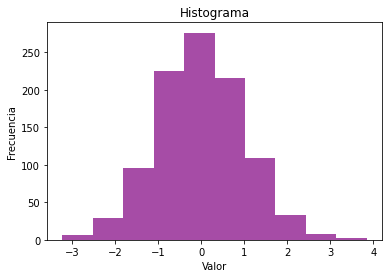

In [4]:
data = np.random.randn(1000)  # 1000 valores con distribución normal
visualizer = DataVisualizer(data)
visualizer.plot(kind='hist', xlabel='Valor', ylabel='Frecuencia', title='Histograma', color='purple')

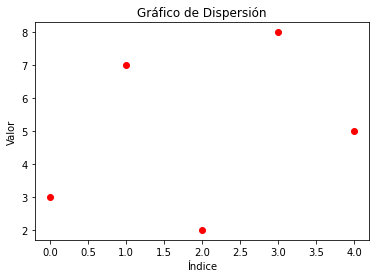

In [5]:
data = pd.Series([3, 7, 2, 8, 5])
visualizer = DataVisualizer(data)
visualizer.plot(kind='scatter', xlabel='Índice', ylabel='Valor', title='Gráfico de Dispersión', color='red')

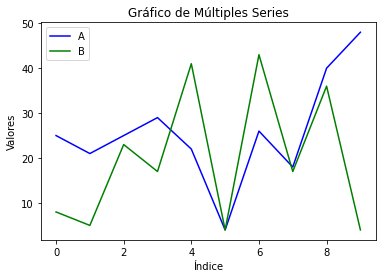

In [7]:
# Prueba con DataFrame de Pandas
df = pd.DataFrame({
    'A': np.random.randint(1, 50, 10),
    'B': np.random.randint(1, 50, 10)
})

visualizer = DataVisualizer(df)
visualizer.plot(kind='line', xlabel='Índice', ylabel='Valores', title='Gráfico de Múltiples Series', legend=['A', 'B'])